In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import fastai
print("fastai: ",fastai.__version__)
import torch
print("Torch: ",torch.__version__)
import torchvision
print("Torchvision: ",torchvision.__version__)
import sklearn
print("sklearn: ",sklearn.__version__)
import sys
print("Python: ",sys.version)

fastai:  1.0.42
Torch:  1.0.1.post2
Torchvision:  0.2.1
sklearn:  0.20.2
Python:  3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]


In [3]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    print("GPU: ",torch.cuda.get_device_name(devID))
else:
    print("Torch Cuda not avaialbe")

GPU:  GeForce GTX 1080 Ti


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [6]:
PATH = '../../../../../data/Humpback/'

In [7]:
import os
print(os.listdir(PATH))

['train.zip', 'train', 'test.zip', 'train.csv', 'test', 'sample_submission.csv']


In [8]:
trainCSV = pd.read_csv(PATH+'train.csv')
trainCSV.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [10]:
trainCSV['Id'].value_counts()

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
w_fd1cb9d     22
w_ab4cae2     22
w_693c9ee     22
w_987a36f     21
w_43be268     21
w_73d5489     21
w_f19faeb     20
w_95874a5     19
w_9b401eb     19
w_c0d494d     18
w_b7d5069     18
w_dbda0d6     17
w_eb0a6ed     17
w_0e737d0     17
w_18eee6e     17
w_17ee910     16
w_a59905f     16
w_67de30b     16
w_b0e05b1     16
w_6c803bf     16
w_ee17a08     15
w_cae7677     15
w_9ca943b     15
w_89e159a     15
w_8c1ec28     14
            ... 
w_d142b00      1
w_e64ad53      1
w_2663598      1
w_b1a8107      1
w_7e9dc07      1
w_771d855      1
w_e5893cb      1
w_b2f1afa      1
w_6cb31c8      1
w_0c3295a      1
w_318e1d2      1
w_b820615      1
w_4e85c68      1
w_ef7cdd5      1
w_ac49dc5      1
w_15ebbda      1
w_408c5a7      1
w_a964291      1
w_f12415b      1
w_5f54bf3      1
w_93d42a1      1
w_61c1f9c      1
w_979a6ef      1
w_d4ab7ad      1
w_a7c6cf3      1
w_ba5336c      1
w_a3dfe32      1
w_5a29f9d     

In [9]:
submissionsCSV = pd.read_csv(PATH+'sample_submission.csv')
submissionsCSV.head()

,Image,Id
0,00029b3a.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
1,0003c693.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
2,000bc353.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
3,0010a672.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
4,00119c3f.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46


In [11]:
fnames = get_image_files(PATH+'train')
fnames[:5]

[PosixPath('../../../../../data/Humpback/train/8de897e9.jpg'),
 PosixPath('../../../../../data/Humpback/train/6a0f071b.jpg'),
 PosixPath('../../../../../data/Humpback/train/20f2aeb0.jpg'),
 PosixPath('../../../../../data/Humpback/train/b83f5353.jpg'),
 PosixPath('../../../../../data/Humpback/train/7e22aca7.jpg')]

In [12]:
# read image size
im=array([list(open_image(image).size) for image in fnames])

In [13]:
type(im), im.shape, im

(numpy.ndarray, (9850, 2), array([[ 452,  992],
        [ 572, 1040],
        [ 700, 1050],
        [ 243, 1050],
        ...,
        [ 600, 1050],
        [ 492,  984],
        [ 238,  923],
        [ 700, 1050]]))

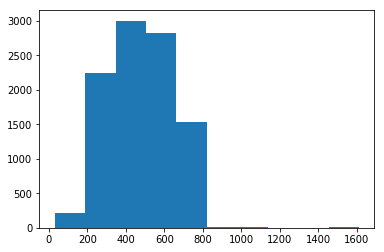

In [14]:
# histogram of x
plt.hist(im[:,0]);

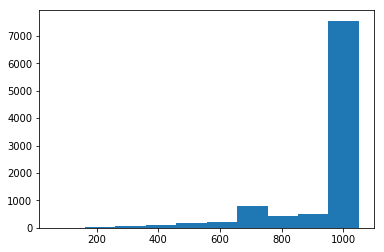

In [15]:
# histogram of y
plt.hist(im[:,1]);

(700, 1050, 3)

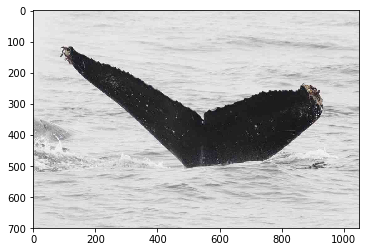

In [33]:
pic=plt.imread(fnames[9849])
plt.imshow(pic)
pic.shape

In [45]:
#img = PIL.Image.open(fnames[1]); 
#img

In [31]:
for file in fnames:
    if( len(plt.imread(file).shape) < 3 ): # grayscale image
        
len(fnames)

9850

In [40]:
len(plt.imread(fnames[0]).shape)

2

In [44]:
len(plt.imread(fnames[100]).shape)

3

In [62]:
tfms = get_transforms(do_flip=True, flip_vert=True)

In [65]:
doc(get_transforms)

In [63]:
#view image augmentations
def get_ex(): return open_image(fnames[100])

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
     rows,cols,figsize=(width,height))[1].flatten())]

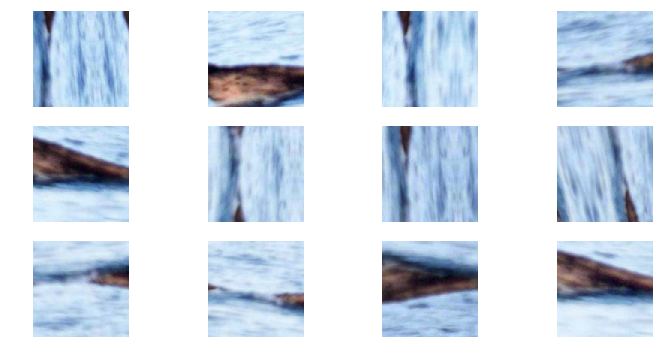

In [64]:
plots_f(3, 5, 12, 6, size=224)

In [66]:
# if size=(224,224) it'll squish (not crop!) it to (224,224)
data = ImageDataBunch.from_csv(PATH, folder='train',test='test',csv_labels='train.csv', ds_tfms=tfms, size=(224,224), bs=16)
data.normalize(imagenet_stats)

/home/norvilr/anaconda3/envs/fastai1.0.42/lib/python3.7/site-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
w_c9eb806, w_15db29f, w_8cc9b05, w_25db560, w_bfaa83c...
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList
y: CategoryList (7880 items)
[Category w_e15442c, Category w_da2efe0, Category w_19e5482, Category w_eaad6a8, Category new_whale]...
Path: ../../../../../data/Humpback
x: ImageItemList (7880 items)
[Image (3, 500, 699), Image (3, 368, 1050), Image (3, 170, 397), Image (3, 317, 1050), Image (3, 456, 1050)]...
Path: ../../../../../data/Humpback;

Valid: LabelList
y: CategoryList (1411 items)
[Category w_3d0bc7a, Category w_06ff732, Category w_e38b2c7, Category w_68820e8, Category new_whale]...
Path: ../../../../../data/Humpback
x: ImageItemList (1411 items)
[Image (3, 441, 1050), Image (3, 600, 1050), Image (3, 421, 658), Image (3, 450, 700), Image (3, 450, 1050)]...
Path: ../../../../../data/Humpback;

Test: LabelList
y: EmptyLabelList (15610 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (15610 items)
[Image (3, 700, 1050), Image (3, 497, 698), Image (3, 356, 1050), Image (3, 655, 1050), Image (3, 5

In [67]:
data.train_ds

LabelList
y: CategoryList (7880 items)
[Category w_e15442c, Category w_da2efe0, Category w_19e5482, Category w_eaad6a8, Category new_whale]...
Path: ../../../../../data/Humpback
x: ImageItemList (7880 items)
[Image (3, 500, 699), Image (3, 368, 1050), Image (3, 170, 397), Image (3, 317, 1050), Image (3, 456, 1050)]...
Path: ../../../../../data/Humpback

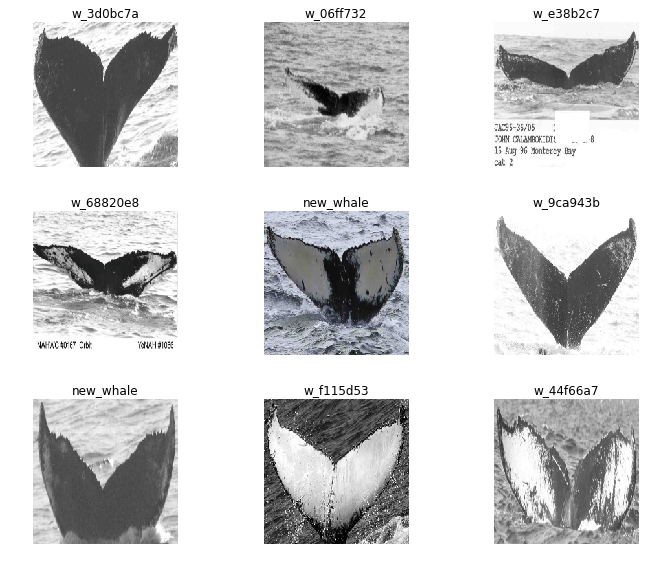

In [68]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

In [69]:
#print(data.classes)
len(data.classes)

3747

In [70]:
learn = create_cnn(data, models.resnet101, metrics=error_rate)

In [71]:
learn.fit_one_cycle(5)
# 1 	8.288634 	7.621109 	0.947690
# 2 	7.915483 	7.200187 	0.900136
# 3 	7.470490 	7.020962 	0.896739
# 4 	7.020436 	6.816136 	0.876359
# 5 	6.508235 	6.799308 	0.879755

epoch,train_loss,valid_loss,error_rate
1,8.209846,7.471091,0.919915
2,7.822033,7.103129,0.889440
3,7.394248,6.835101,0.877392
4,6.917046,6.592392,0.871722
5,6.342802,6.549341,0.865344


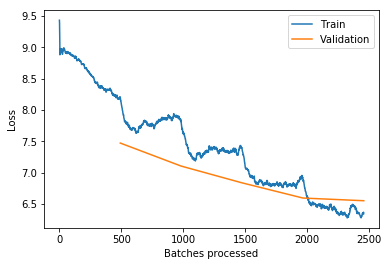

In [72]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


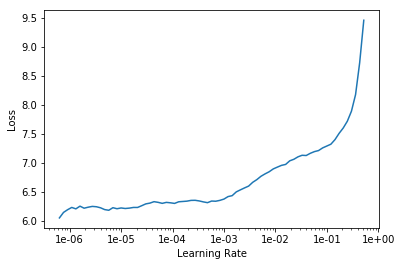

In [73]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [74]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-5))
# epoch 	train_loss 	valid_loss 	error_rate
# 1 	6.574177 	6.804043 	0.874321
# 2 	6.538513 	6.758852 	0.881114
# 3 	6.445692 	6.708827 	0.875000
# 4 	6.263362 	6.656760 	0.872962
# 5 	6.204262 	6.645457 	0.870924

epoch,train_loss,valid_loss,error_rate
1,6.341956,6.544195,0.866052
2,6.267898,6.512581,0.866761
3,6.218099,6.497922,0.858257
4,6.259423,6.481471,0.857548
5,6.145992,6.474794,0.853296
